Objectives

Use Linear Regression in one variable to fit the parameters to a model
Use Linear Regression in multiple variables to fit the parameters to a model
Use Polynomial Regression in single variable tofit the parameters to a model
Create a pipeline for performing linear regression using multiple features in polynomial scaling
Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters

Importing Required Libraries
We recommend you import all required libraries in one place (here):

In [68]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

In [69]:
df = pd.read_csv("laptops.csv")
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [70]:
lm=LinearRegression()
X= df[["CPU_frequency"]]
Y= df["Price"]

lm.fit(X,Y)
Yhat=lm.predict(X)

c:\Users\Jazib Khan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jazib Khan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


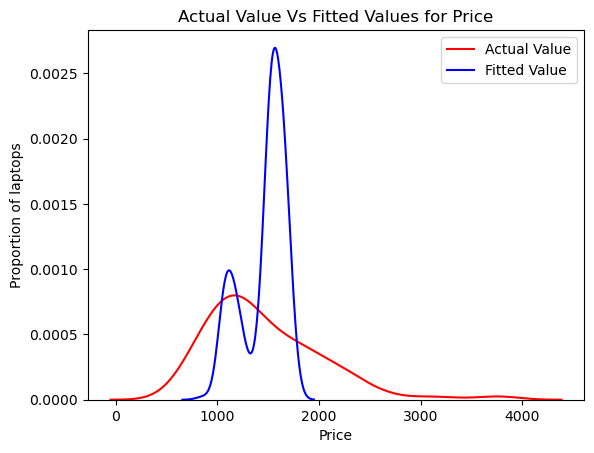

In [71]:
ax1 = sns.distplot(df["Price"],hist = False,color = "r",label = "Actual Value")
sns.distplot(Yhat,hist = False, color = "b", label = "Fitted Values",ax = ax1)

plt.title("Actual Value Vs Fitted Values for Price")
plt.xlabel("Price")
plt.ylabel("Proportion of laptops")
plt.legend(['Actual Value','Fitted Value'])
plt.show()

In [72]:
# Evaluate the Mean Squared Error and R^2 score values for the model.
mse_slr = mean_squared_error(df["Price"],Yhat)
r2_score_slr = lm.score(X,Y)
print("The R2 of Simple Linear Regression is :",r2_score_slr)
print("The Mean Squared Error of Simple Linear Regression is :",mse_slr)

The R2 of Simple Linear Regression is : 0.1344436321024326
The Mean Squared Error of Simple Linear Regression is : 284583.4405868629


In [73]:
# Multiple Linear Regression
# The parameters which have a low enough p-value so as to indicate strong relationship with
#  the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. 
# Use all these variables to create a Multiple Linear Regression system.

lm1 = LinearRegression()
Z = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU','Category']]
lm1.fit(Z,Y)
Y_hat = lm1.predict(Z)

c:\Users\Jazib Khan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jazib Khan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Proportion of laptops')

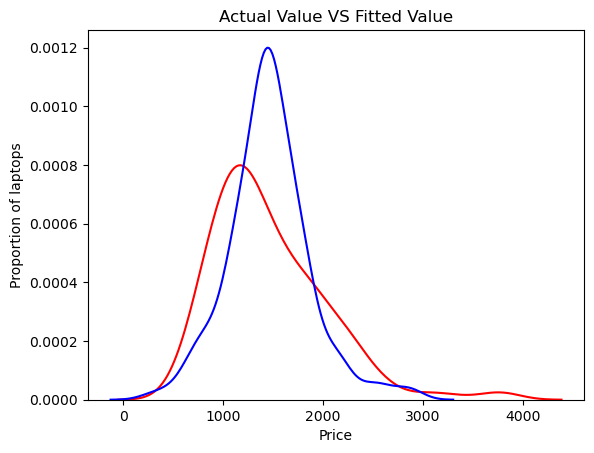

In [74]:
# Plot the Distribution graph of the predicted values as well as the Actual values
ax2 = sns.distplot(df['Price'], hist = False , color = "r", label = "Actual Values")
sns.distplot(Y_hat, hist = False , color = "b", label = "Fitted Values",ax=ax2)

plt.title("Actual Value VS Fitted Value")
plt.xlabel('Price')
plt.ylabel("Proportion of laptops")

In [75]:

# Find the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?
mse_mlr =mean_squared_error(df['Price'],Y_hat)
r2_score_mlr = lm1.score(Z,Y)
print("The Mean Squared Error of  MLR is:", mse_mlr)
print("The r2 Score of  MLR is:", r2_score_mlr)



The Mean Squared Error of  MLR is: 161680.57263893104
The r2 Score of  MLR is: 0.5082509055187376


In [76]:
# Polynomial Regression
# Use the variable "CPU_frequency" to create Polynomial features. 
# Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using numpy.polyfit.

X = X.to_numpy().flatten()

f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5=np.poly1d(f5)

Plot the regression output against the actual data points to note how the data fits in each case. To plot the polynomial response over the actual data points, you have the function shown below.

In [77]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

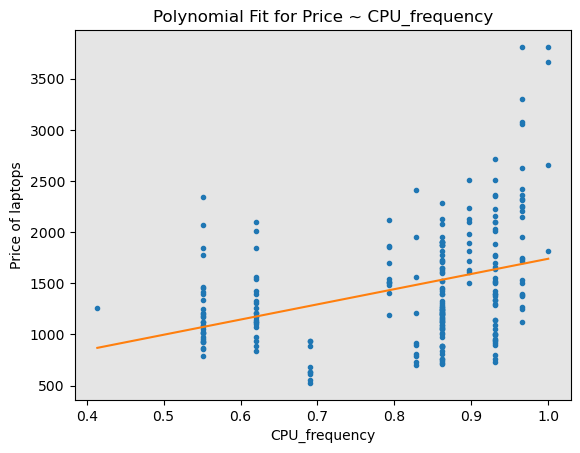

In [78]:
# Call this function for the 3 models created and get the required graphs.
PlotPolly (p1,X,Y,"CPU_frequency" )

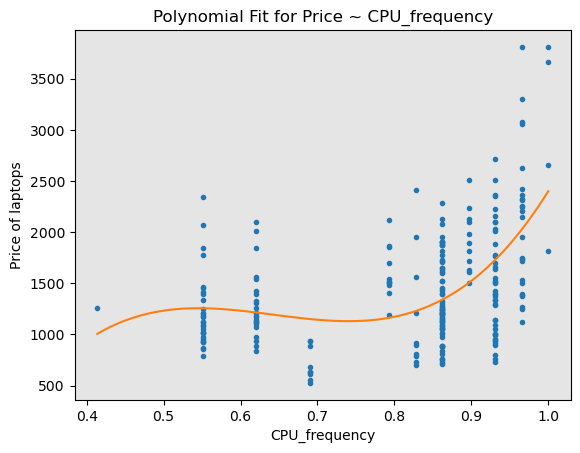

In [79]:
PlotPolly (p3,X,Y,"CPU_frequency" )

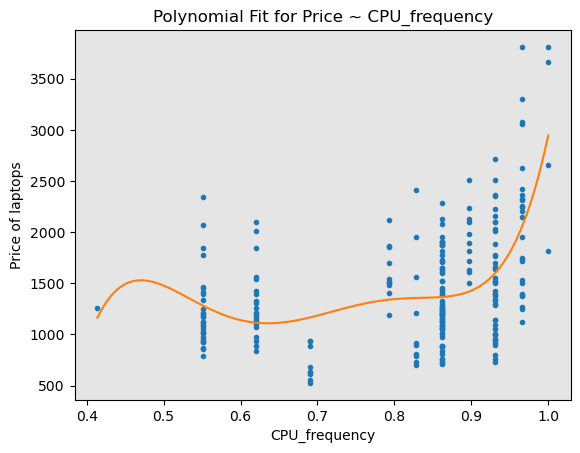

In [80]:
PlotPolly (p5,X,Y,"CPU_frequency" )

Also, calculate the R^2 and MSE values for these fits. For polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values.

In [81]:
r2_squared1= r2_score(Y,p1(X))
print("The r2_score of P1 is:",r2_squared1)
print("The MSE of P1 is:",mean_squared_error(Y,p1(X)))
print()
r2_squared3= r2_score(Y,p3(X))
print("The r2_score of P3 is:",r2_squared3)
print("The MSE of P3 is:",mean_squared_error(Y,p3(X)))
print()
r2_squared5= r2_score(Y,p5(X))
print("The r2_score of P5 is:",r2_squared5)
print("The MSE of P5 is:",mean_squared_error(Y,p5(X)))


The r2_score of P1 is: 0.13444363210243238
The MSE of P1 is: 284583.44058686297

The r2_score of P3 is: 0.2669264079653123
The MSE of P3 is: 241024.8630384873

The r2_score of P5 is: 0.3030822706443609
The MSE of P5 is: 229137.29548054465


 Pipeline
Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline.

In [82]:
Input = [('Scale',StandardScaler()),('Polynomial',PolynomialFeatures(include_bias =False)),
         ('model',LinearRegression())]
pipe = Pipeline(Input)
Z=Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
# print(ypipe)

In [83]:
# Evaluate the MSE and R^2 values for the this predicted output.

print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))

R^2 for multi-variable polynomial pipeline is:  0.6332093399457249
MSE for multi-variable polynomial pipeline is:  120595.89864368599
